In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('requirements.csv')

In [82]:
df['requirement'] = df['requirement'].str.lower()
df['requirement'] = df['requirement'].str.replace('\n', ' ')
df['requirement'] = df['requirement'].str.replace('\t', ' ')
df['requirement'] = df['requirement'].str.replace('\r', ' ')
df['requirement'] = df['requirement'].str.replace('', ' ')
df['requirement'] = df['requirement'].str.replace('', ' ')
df['requirement'] = df['requirement'].str.replace('’', "'")
df['requirement'] = df['requirement'].str.replace('  ', ' ')
df['requirement'] = df['requirement'].str.replace(',', '')
df['requirement'] = df['requirement'].str.replace(';', '')
df['requirement'] = df['requirement'].str.replace('(', '')
df['requirement'] = df['requirement'].str.replace(')', '')
df['requirement'] = df['requirement'].str.replace('.', '')
df['requirement'] = df['requirement'].str.replace('\'', '')
df['requirement'] = df['requirement'].str.replace('\"', '')
df['requirement'] = df['requirement'].str.replace('’', '')
df['requirement'] = df['requirement'].str.replace('“', '')
df['requirement'] = df['requirement'].str.replace('”', '')
df['requirement'] = df['requirement'].str.replace('‘', '')
df['requirement'] = df['requirement'].str.replace('—', '')
df['requirement'] = df['requirement'].str.replace('–', '')
df['requirement'] = df['requirement'].str.replace('•', '')
df['requirement'] = df['requirement'].str.replace('!', '')
df['requirement'] = df['requirement'].str.replace('?', '')
df['requirement'] = df['requirement'].str.replace(':', '')
df['requirement'] = df['requirement'].str.replace(';', '')
df['requirement'] = df['requirement'].str.replace('-', '')
df['requirement'] = df['requirement'].str.replace('/', '')
df['requirement'] = df['requirement'].str.replace('&', '')
df['requirement'] = df['requirement'].str.replace('>', '')
df['requirement'] = df['requirement'].str.replace('<', '')
df['requirement'] = df['requirement'].str.replace('=', '')
df['requirement'] = df['requirement'].str.replace('+', '')
df['requirement'] = df['requirement'].str.replace('*', '')
df['requirement'] = df['requirement'].str.replace('%', '')
df['requirement'] = df['requirement'].str.replace('^', '')
df['requirement'] = df['requirement'].str.replace('@', '')
df['requirement'] = df['requirement'].str.replace('#', '')
df['requirement'] = df['requirement'].str.replace('$', '')
df['requirement'] = df['requirement'].str.replace('~', '')
df['requirement'] = df['requirement'].str.replace('`', '')

df['requirement'] = df['requirement'].str.strip()


<Axes: ylabel='requirement'>

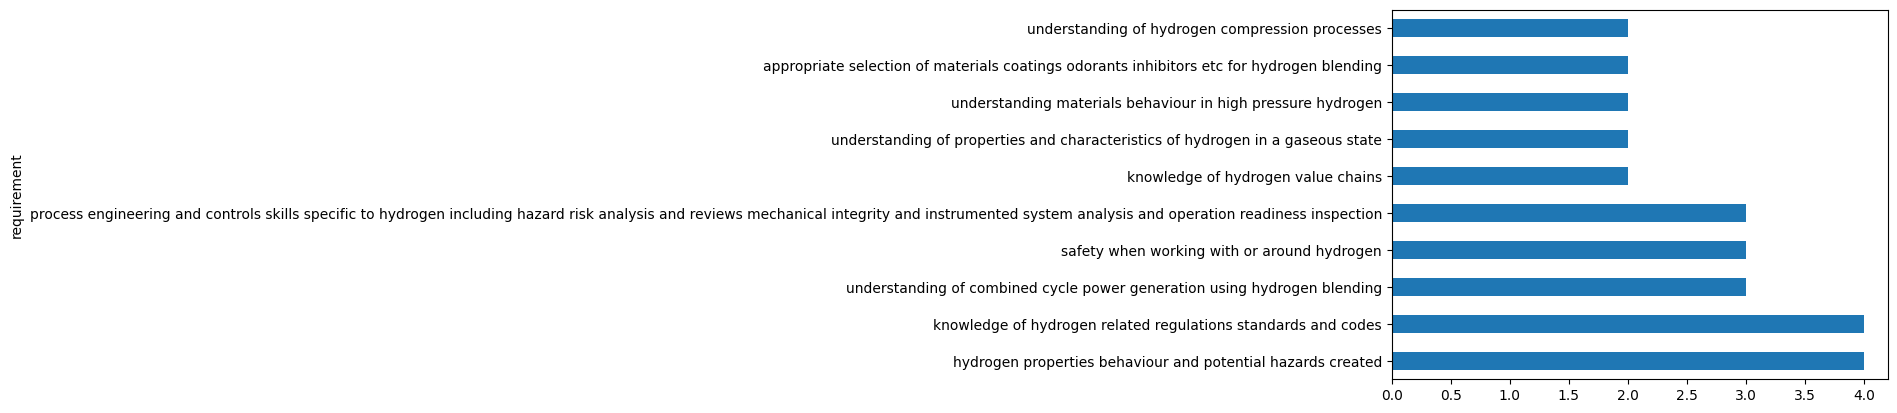

In [83]:
df['requirement'].value_counts().head(10).plot(kind='barh')

In [84]:
df.head()

,id,requirement
0,1,this programming may also demand integrating s...
1,2,knowledge of electrolyser hydrogen production ...
2,3,experience and knowledge of hydrogen fueling e...
3,4,knowledge of hydrogen technologies and value p...
4,5,materials coatings and inhibitors to use and c...


In [85]:
from transformers import BertTokenizer, BertModel
import torch

# Step 2: Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Function to get embeddings for a single text
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[0][0].numpy()  # CLS token's embedding
    return embeddings

# Step 3: Compute embeddings for each requirement and store them in the DataFrame
df['embedding'] = df['requirement'].apply(get_embedding)

print(df)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will b

      id                                        requirement  \
0      1  this programming may also demand integrating s...   
1      2  knowledge of electrolyser hydrogen production ...   
2      3  experience and knowledge of hydrogen fueling e...   
3      4  knowledge of hydrogen technologies and value p...   
4      5  materials coatings and inhibitors to use and c...   
..   ...                                                ...   
346  347  stakeholder consultations with engineering pro...   
347  348        safety when working with or around hydrogen   
348  349  depending on the hydrogenrelated product manuf...   
349  350  they will need an awareness of the changing ma...   
350  351  strong industry knowledge and experience with ...   

                                             embedding  
0    [-0.011904638, -0.06986293, 0.3082487, 0.12715...  
1    [-0.5539698, -0.058984283, -0.33657923, -0.262...  
2    [-0.8503653, 0.01705182, -0.43274313, -0.33338...  
3    [-0.937503

In [128]:

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, fcluster
from transformers import BertTokenizer, BertModel
import torch
# Convert embeddings to a numpy array for comparison
embeddings_matrix = np.vstack(df['embedding'].values)

# Compute cosine similarity
cosine_sim = cosine_similarity(embeddings_matrix)

# Perform hierarchical clustering
linkage_matrix = linkage(cosine_sim, method='ward')  # Using Ward's method
max_d = 0.98  # Distance threshold to define clusters
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

# Add cluster labels to DataFrame
df['cluster'] = clusters

print(df[['id', 'requirement', 'cluster']])

      id                                        requirement  cluster
0      1  this programming may also demand integrating s...        9
1      2  knowledge of electrolyser hydrogen production ...       45
2      3  experience and knowledge of hydrogen fueling e...       27
3      4  knowledge of hydrogen technologies and value p...       31
4      5  materials coatings and inhibitors to use and c...       19
..   ...                                                ...      ...
346  347  stakeholder consultations with engineering pro...        9
347  348        safety when working with or around hydrogen       22
348  349  depending on the hydrogenrelated product manuf...        2
349  350  they will need an awareness of the changing ma...        8
350  351  strong industry knowledge and experience with ...       37

[351 rows x 3 columns]


In [113]:
df.columns

Index(['id', 'requirement', 'embedding', 'cluster'], dtype='object')

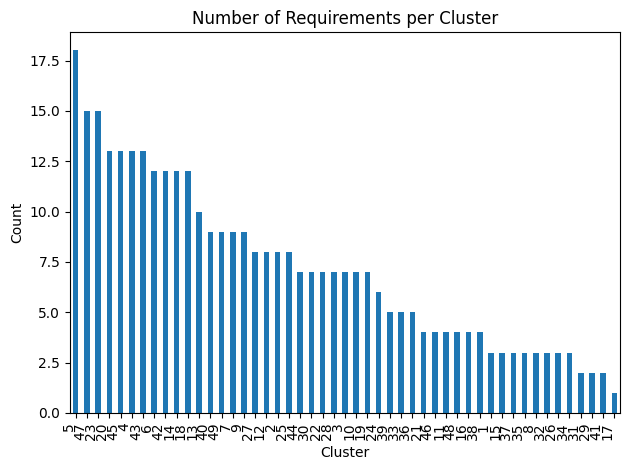

In [129]:
# Plot bar chart with spaced x-axis ticks
cluster_counts = df['cluster'].value_counts()
ax = cluster_counts.plot(kind='bar')

# Space out x-axis ticks
ax.set_xticks(np.arange(len(cluster_counts)))
ax.set_xticklabels(cluster_counts.index, rotation=90, ha='right')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Requirements per Cluster')
plt.tight_layout()  # Adjust layout to make room for tick labels
plt.show()

In [137]:
# Print each cluster

clusters = []
for cluster_id in range(1, df['cluster'].max() + 1):
    print(f'Cluster {cluster_id}:')
    cl = []
    for row in df[df['cluster'] == cluster_id]['requirement']:
        print(f' - {row}')
        cl.append(row)
    clusters.append(cl)
    print()

Cluster 1:
 - hydrogen refueling
 - hydrogen refueling
 - produce techno economic analysis reports

Cluster 2:
 - nothing that specifically impacts this occupations ability to apply expertise to the hydrogen industry
 - nothing that impacts this occupations ability to apply expertise for the hydrogen industry
 - nothing that impacts this occupations ability to apply expertise to manufacturing for the hydrogen industry
 - nothing that impacts this occupations ability to apply expertise to manufacturing for hydrogen supply chains
 - domain knowledge of the hydrogen value chain involved is an asset
 - depending on the hydrogen related product manufactured may require hydrogen specific skillsknowledge as listed here
 - nothing that impacts this occupations ability to apply expertise to manufacturing for the hydrogen supply chains
 - depending on the hydrogenrelated product manufactured may require hydrogen specific skillsknowledge as listed here

Cluster 3:
 - marine engineers will need an

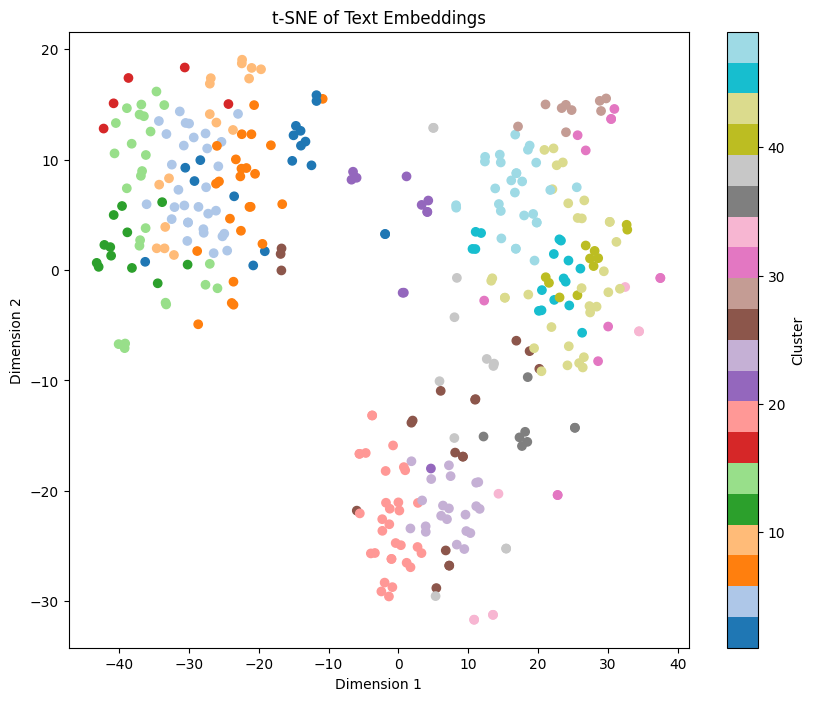

In [90]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
reduced_embeddings_tsne = tsne.fit_transform(embeddings_matrix)

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1], c=df['cluster'], cmap='tab20', marker='o')
plt.colorbar(scatter, label='Cluster')
plt.title('t-SNE of Text Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(False)  # Remove grid lines
plt.show()

In [91]:
df.head()

,id,requirement,embedding,cluster
0,1,this programming may also demand integrating s...,"[-0.011904638, -0.06986293, 0.3082487, 0.12715...",9
1,2,knowledge of electrolyser hydrogen production ...,"[-0.5539698, -0.058984283, -0.33657923, -0.262...",45
2,3,experience and knowledge of hydrogen fueling e...,"[-0.8503653, 0.01705182, -0.43274313, -0.33338...",27
3,4,knowledge of hydrogen technologies and value p...,"[-0.937503, -0.021940704, 0.10741192, 0.164552...",31
4,5,materials coatings and inhibitors to use and c...,"[-0.14427876, 0.12862074, -0.1059176, 0.086217...",19


In [92]:
df.to_csv('cluster_results.csv', index=False)

In [131]:
print(len(clusters))

351


In [21]:
import openai
import private
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate


openai.api_key = private.openai_api_key

PROMPT_TEMPLATE = """
Answer the question based only on the following context:

{context}

---

Answer the question based on the above context: {question}
"""

responses = []

for c in clusters:
    prompt = '''
    Below are the values within a cluster. Please summarize the meaning of the cluster in no more than 10 words.
    '''
    prompt += ''.join([f'{i}\n' for i in c])
    print(prompt)
    print()

    model = ChatOpenAI( model='gpt-3.5-turbo', 
                       api_key=private.openai_api_key,
                       max_tokens=16,)
    response = model.predict(prompt)

    responses.append((c, response))
    print(response)




    Below are the values within a cluster. Please summarize the meaning of the cluster in no more than 10 words.
    nothing that impacts this occupation's ability to apply expertise to manufacturing for the hydrogen supply chains
domain knowledge of the hydrogen value chain involved is an asset
nothing that impacts this occupation's ability to apply expertise to manufacturing for hydrogen supply chains
nothing that impacts this occupation's ability to apply expertise to manufacturing for the hydrogen industry
nothing that specifically impacts this occupation's ability to apply expertise to the hydrogen industry
nothing that impacts this occupation's ability to apply expertise for the hydrogen industry


Cluster Summary: Expertise in manufacturing for hydrogen supply chain industry.

    Below are the values within a cluster. Please summarize the meaning of the cluster in no more than 10 words.
    eco-driving techniques: a method of driving a vehicle using less fuel and having less o

In [22]:
responses

[(["nothing that impacts this occupation's ability to apply expertise to manufacturing for the hydrogen supply chains",
   'domain knowledge of the hydrogen value chain involved is an asset',
   "nothing that impacts this occupation's ability to apply expertise to manufacturing for hydrogen supply chains",
   "nothing that impacts this occupation's ability to apply expertise to manufacturing for the hydrogen industry",
   "nothing that specifically impacts this occupation's ability to apply expertise to the hydrogen industry",
   "nothing that impacts this occupation's ability to apply expertise for the hydrogen industry"],
  'Cluster Summary: Expertise in manufacturing for hydrogen supply chain industry.'),
 (['eco-driving techniques: a method of driving a vehicle using less fuel and having less of an impact on the environment',
   'eco-driving techniques: a method of driving a vehicle using less fuel and having less impact on the environment',
   'eco-driving techniques: a method of 

In [24]:


cluster_summaires = [t[1] for t in responses]

for i, summary in enumerate(cluster_summaires):
    print(f'Cluster {i + 1}: {summary}')



Cluster 1: Cluster Summary: Expertise in manufacturing for hydrogen supply chain industry.
Cluster 2: Cluster summary: Eco-friendly driving practices and fuel cell technology for sustainability.
Cluster 3: Cluster summary: Hydrogen refueling station for fuel cell vehicles.
Cluster 4: Cluster summary: Safety and expertise in working with hydrogen products.
Cluster 5: Expertise in hydrogen gas value chains and fuel cell technology.
Cluster 6: Expertise in hydrogen regulations, properties, production, distribution, and safety.
Cluster 7: Cluster summary: Expertise in hydrogen fueling technology, materials, coatings, and
Cluster 8: Cluster: Expertise in hydrogen technology and safety standards for various applications.
Cluster 9: Cluster summary: Comprehensive knowledge of hydrogen production, compression, and power generation.
Cluster 10: Cluster: Study of hydrogen properties, behavior, and potential hazards.
Cluster 11: Cluster: Advanced knowledge of hydrogen safety, regulations, and pow

In [ ]:
clusters = [
    (1, "Manufacturing for Hydrogen Supply Chain"),
    (2, "Eco-Friendly Driving & Fuel Cells"),
    (3, "Hydrogen Refueling Stations"),
    (4, "Hydrogen Safety & Expertise"),
    (5, "Hydrogen Value Chains & Fuel Cells"),
    (6, "Hydrogen Regulations & Safety"),
    (7, "Hydrogen Fueling Tech & Materials"),
    (8, "Hydrogen Technology & Safety Standards"),
    (9, "Hydrogen Production & Power Generation"),
    (10, "Hydrogen Properties & Hazards"),
    (11, "Hydrogen Safety, Regulations, & Power"),
    (12, "Hydrogen Pressure & Temperature Maintenance"),
    (13, "Hydrogen Pressure & Temperature Testing"),
    (14, "Economic Analysis of Hydrogen Tech"),
    (15, "Safe Hydrogen Utilization & Maintenance"),
    (16, "Hydrogen Tech, Regulations & Business"),
    (17, "Hydrogen Equipment Design & Maintenance"),
    (18, "Hydrogen Compression & Transmission Maintenance"),
    (19, "Hydrogen Production & Equipment Management")
]


